In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/WordDifficulty.csv')

In [3]:
df.head()

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,a,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
1,aah,3,222,5.40,816.43,0.21,186.03,21.0,0.62
2,Aaron,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
3,aback,5,387,5.96,796.27,0.11,171.61,15.0,0.45
4,abacus,6,513,6.24,964.40,0.65,489.00,15.0,0.47


### cleaning

In [4]:
df = df.dropna(axis = 0).reset_index(drop=True) # missing data has no value to us

In [5]:
df.shape

(40449, 9)

In [6]:
df.head()

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,a,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
1,aah,3,222,5.40,816.43,0.21,186.03,21.0,0.62
2,Aaron,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
3,aback,5,387,5.96,796.27,0.11,171.61,15.0,0.45
4,abacus,6,513,6.24,964.40,0.65,489.00,15.0,0.47


In [7]:
df = df[df.columns[1:]]

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
df.head()

,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
1,3,222,5.40,816.43,0.21,186.03,21.0,0.62
2,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
3,5,387,5.96,796.27,0.11,171.61,15.0,0.45
4,6,513,6.24,964.40,0.65,489.00,15.0,0.47


In [10]:
df_scaled = StandardScaler().fit_transform(df)

In [11]:
df_scaled.shape

(40449, 8)

In [12]:
init_pca = PCA(n_components = 8) # 8 features in our initial dataframe

In [13]:
df_init_pca = init_pca.fit(df_scaled)

In [14]:
df_init_pca.__dict__

{'n_components': 8,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'n_features_in_': 8,
 '_fit_svd_solver': 'full',
 'mean_': array([-1.08208936e-16,  0.00000000e+00, -6.46442994e-17,  4.31430433e-16,
        -3.37274606e-17, -8.36159960e-17, -1.44747018e-16, -5.70556208e-16]),
 'noise_variance_': 0.0,
 'n_samples_': 40449,
 'components_': array([[ 2.43717348e-01, -5.50981854e-02, -3.65561379e-01,
          4.54186059e-01,  4.62486163e-01,  3.26026284e-01,
         -3.82308910e-01, -3.62352390e-01],
        [-5.81225221e-01,  9.64214126e-02,  1.00332978e-02,
         -1.90465342e-01, -1.07266373e-01, -2.86173677e-01,
         -4.89107251e-01, -5.32799295e-01],
        [ 2.48800611e-02,  9.64395250e-01,  1.78786275e-01,
          9.10036197e-02,  5.84327276e-02,  1.59375481e-01,
          6.65833505e-03,  1.47422106e-02],
        [ 4.43787011e-01,  1.9956

In [15]:
sum(df_init_pca.explained_variance_ratio_)

1.0000000000000002

In [16]:
n = []
var_exp = []

for i in range(1, 9):
    curr = PCA(n_components = i)
    n.append(i)
    var_exp.append(sum(curr.fit(df_scaled).explained_variance_ratio_))

In [17]:
n

[1, 2, 3, 4, 5, 6, 7, 8]

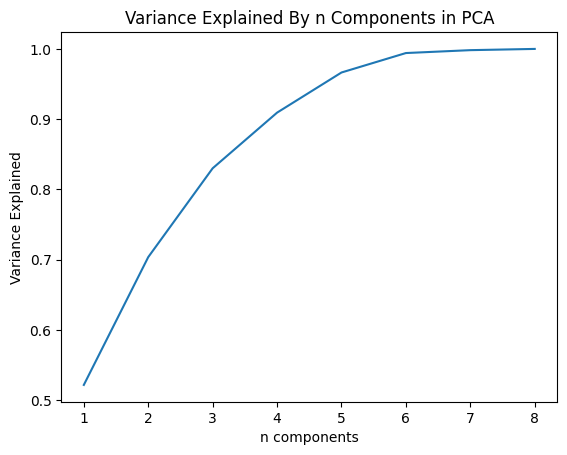

In [18]:
sns.lineplot(x = n, y = var_exp)
plt.title("Variance Explained By n Components in PCA")
plt.xlabel("n components")
plt.ylabel("Variance Explained")
plt.show()

Looks like 6 is a good cutoff for the number of components!

In [19]:
pca_6 = pd.DataFrame(PCA(n_components=6).fit_transform(df_scaled), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])

In [20]:
pca_6.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953


In [21]:
assert pca_6.shape[0] == df_scaled.shape[0]

In [22]:
df.head()

,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
1,3,222,5.40,816.43,0.21,186.03,21.0,0.62
2,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
3,5,387,5.96,796.27,0.11,171.61,15.0,0.45
4,6,513,6.24,964.40,0.65,489.00,15.0,0.47


In [23]:
pd.DataFrame(df_scaled[:, 4]).describe()

,0
count,4.044900e+04
mean,-3.372746e-17
std,1.000012e+00
min,-2.232786e+00
25%,-7.612440e-01
50%,-1.553150e-01
75%,6.020962e-01
max,5.427888e+00


<Axes: >

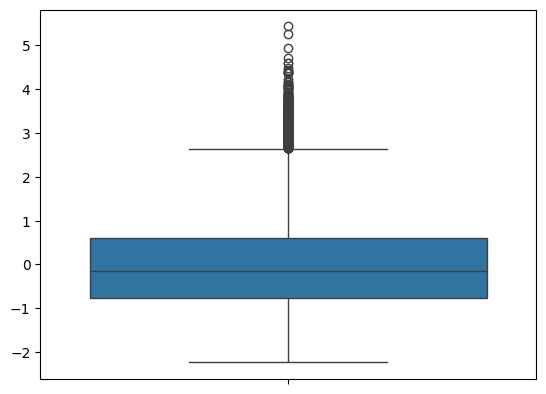

In [24]:
sns.boxplot(df_scaled[:, 4])

In [25]:
lst_categories = []

for score in df_scaled[:, 4].T:
    if score <= 0: # easy word?
        lst_categories.append("easy")
    elif score <= 2: # medium word?
        lst_categories.append("medium")
    else:
        lst_categories.append("hard")

In [26]:
print(df_scaled[:, 4].T.shape)

(40449,)


In [27]:
assert len(lst_categories) == df_scaled.shape[0]

In [28]:
pca_6['group'] = lst_categories

In [29]:
pca_6.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,easy
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317,medium
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,easy
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947,medium
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953,medium


In [30]:
pca_6['group'].value_counts()

group
easy      22621
medium    16162
hard       1666
Name: count, dtype: int64

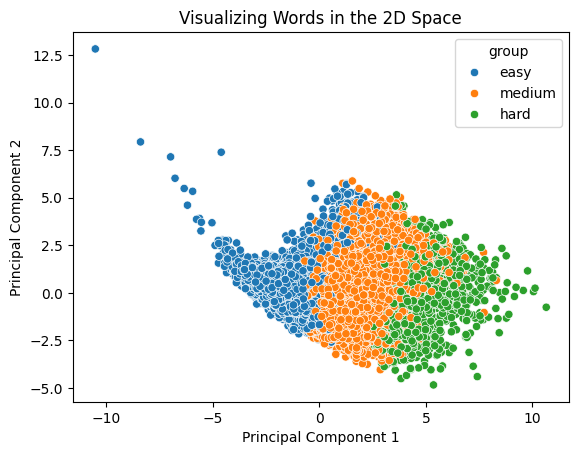

In [31]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue='group', data=pca_6)
plt.title("Visualizing Words in the 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

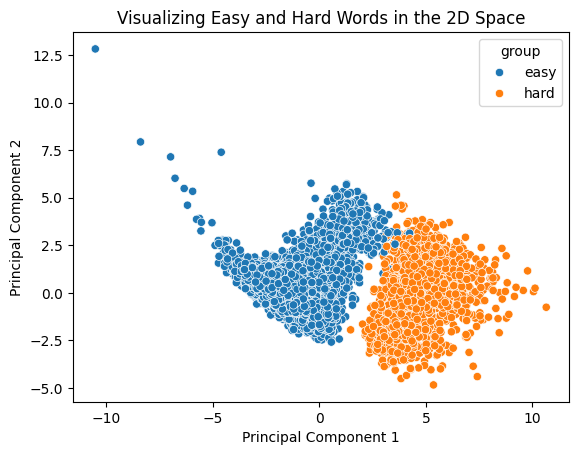

In [32]:
sns.scatterplot(x = 'pc1', 
                y = 'pc2', 
                hue='group', 
                data=pca_6[pca_6['group'].eq('easy') | pca_6['group'].eq('hard')])
plt.title("Visualizing Easy and Hard Words in the 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# wu tou time to do umap

In [33]:
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

In [34]:
umap_df = pd.read_csv('data/WordDifficulty.csv')
umap_df.dropna(axis = 0, inplace=True)

In [35]:
umap_df.head() # new copy of the dataframe

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,a,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
1,aah,3,222,5.40,816.43,0.21,186.03,21.0,0.62
2,Aaron,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
3,aback,5,387,5.96,796.27,0.11,171.61,15.0,0.45
4,abacus,6,513,6.24,964.40,0.65,489.00,15.0,0.47


In [36]:
umap_data = StandardScaler().fit_transform(umap_df[umap_df.columns[1:]])

In [37]:
umap_data.shape # getting the data

(40449, 8)

In [38]:
reduced_data = pd.DataFrame(
    umap.UMAP(
        min_dist = 0.1,
        n_neighbors = 20
    ).fit_transform(umap_data)
)

In [39]:
reduced_data['group'] = pca_6['group'] # borrowing the labels from the pca

In [40]:
reduced_data.head()

,0,1,group
0,13.669537,7.143291,easy
1,2.681728,5.258139,medium
2,7.921146,5.083414,easy
3,1.166480,6.178191,medium
4,-1.318457,4.937943,medium


<Axes: xlabel='0', ylabel='1'>

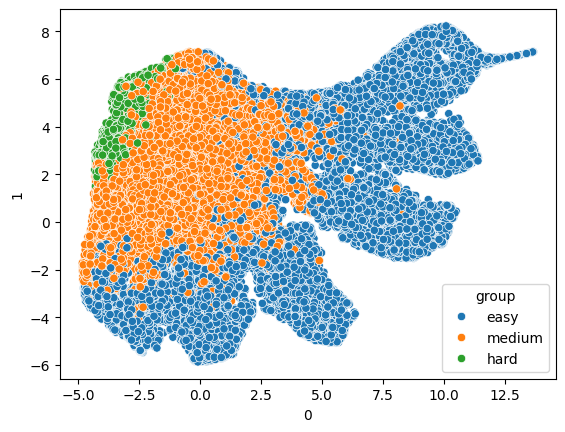

In [74]:
sns.scatterplot(x = reduced_data.columns[0], 
                y = reduced_data.columns[1], 
                hue=reduced_data.columns[2], 
                data = reduced_data)# [reduced_data['group'].eq('easy') | reduced_data['group'].eq('hard')])

### PCA with new Data

In [42]:
updated_df = pd.read_csv('data/NewWordDifficulty.csv')

In [44]:
updated_df.head()

,Word,Length,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,PoS,SentimentScore
0,a,1,16.18,798.92,-0.01,0.73,1,-0.000000,DT,0.0
1,aah,3,5.40,816.43,0.21,0.62,2,0.918296,JJ,0.0
2,aaron,5,9.29,736.06,-0.11,0.97,3,1.921928,NN,0.0
3,aback,5,5.96,796.27,0.11,0.45,2,1.921928,NN,0.0
4,abacus,6,6.24,964.40,0.65,0.47,3,2.251629,NN,0.0


In [46]:
len(updated_df['PoS'].value_counts())

29

In [47]:
updated_df.columns

Index(['Word', 'Length', 'Log_Freq_HAL', 'I_Mean_RT', 'I_Zscore',
       'I_Mean_Accuracy', 'Vowels', 'Entropy', 'PoS', 'SentimentScore'],
      dtype='object')

In [48]:
updated_df_no_pos = updated_df[['Length', 'Log_Freq_HAL', 'I_Mean_RT', 'I_Zscore',
       'I_Mean_Accuracy', 'Vowels', 'Entropy', 'SentimentScore']]

In [49]:
updated_df_no_pos.head()

,Length,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,SentimentScore
0,1,16.18,798.92,-0.01,0.73,1,-0.000000,0.0
1,3,5.40,816.43,0.21,0.62,2,0.918296,0.0
2,5,9.29,736.06,-0.11,0.97,3,1.921928,0.0
3,5,5.96,796.27,0.11,0.45,2,1.921928,0.0
4,6,6.24,964.40,0.65,0.47,3,2.251629,0.0


In [50]:
sud = StandardScaler().fit_transform(updated_df_no_pos)

In [52]:
sud.shape

(40467, 8)

performing PCA now after scaling

In [60]:
number_components = []
variance_explained = []

for i in range(1, 9):
    curr = PCA(n_components = i)
    number_components.append(i)
    variance_explained.append(sum(curr.fit(sud).explained_variance_ratio_))

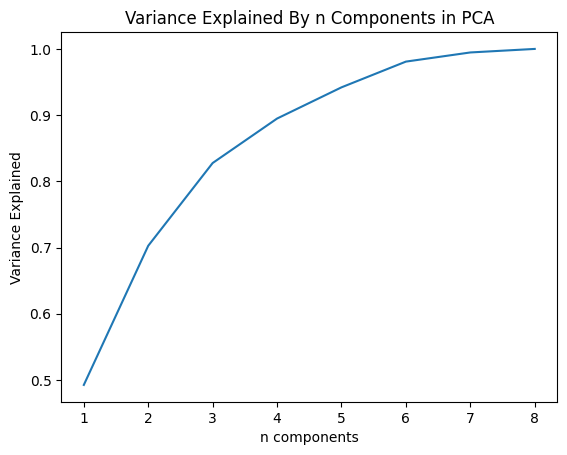

In [61]:
sns.lineplot(x = n, y = var_exp)
plt.title("Variance Explained By n Components in PCA")
plt.xlabel("n components")
plt.ylabel("Variance Explained")
plt.show()

In [62]:
new_pca_6 = pd.DataFrame(
    PCA(n_components=6).fit_transform(df_scaled), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']
)

In [63]:
new_pca_6.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953


In [64]:
new_pca_6['group'] = pca_6['group'] # borrowing the labels from pca_6

In [65]:
new_pca_6.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,easy
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317,medium
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,easy
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947,medium
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953,medium


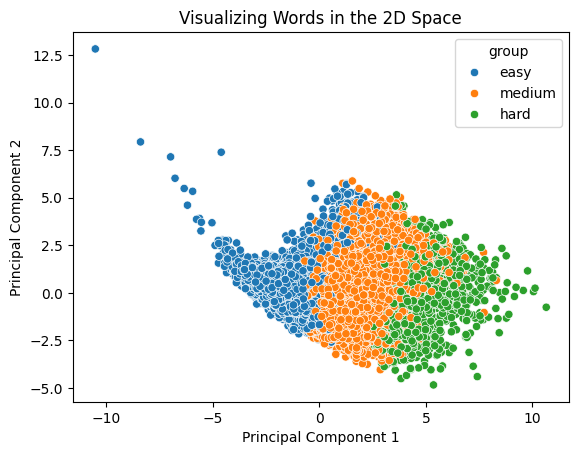

In [66]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue='group', data=new_pca_6)
plt.title("Visualizing Words in the 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

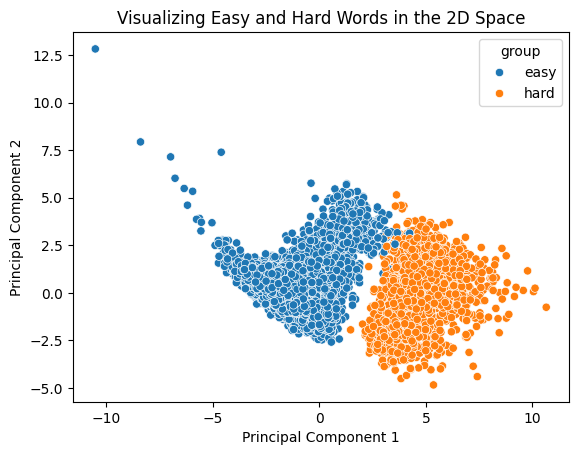

In [67]:
sns.scatterplot(x = 'pc1', 
                y = 'pc2', 
                hue='group', 
                data=new_pca_6[new_pca_6['group'].eq('easy') | new_pca_6['group'].eq('hard')])
plt.title("Visualizing Easy and Hard Words in the 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [78]:
sud_umap = pd.DataFrame(
    umap.UMAP(
        min_dist = 0.1,
        n_neighbors = 5
    ).fit_transform(sud)
)

In [79]:
sud_umap['group'] = pca_6['group']

<Axes: xlabel='0', ylabel='1'>

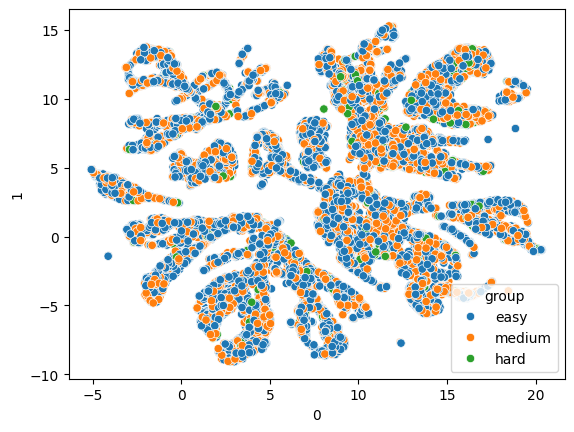

In [80]:
sns.scatterplot(x = sud_umap.columns[0], 
                y = sud_umap.columns[1], 
                hue=sud_umap.columns[2], 
                data = sud_umap) #[sud_umap['group'].eq('easy') | sud_umap['group'].eq('hard')])

In [81]:
sud_umap.head()

,0,1,group
0,3.758910,13.669141,easy
1,3.305027,12.718360,medium
2,5.517585,10.248962,easy
3,1.392845,8.791294,medium
4,6.853371,4.170195,medium


### doing K-Means clustering on `new_pca_6`

In [82]:
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score, adjusted_rand_score

In [83]:
new_pca_6.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,easy
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317,medium
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,easy
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947,medium
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953,medium


In [86]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", n_init = 4).fit(new_pca_6[new_pca_6.columns[0:6]].to_numpy())

In [88]:
kmeans_df = new_pca_6.copy(deep=True)

In [89]:
kmeans_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,easy
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317,medium
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,easy
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947,medium
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953,medium


In [90]:
def convert_labels(label):
    if label == "easy":
        return 0
    if label == "medium":
        return 1
    if label == "hard":
        return 2
    return -1 # edge case

In [91]:
kmeans_df['group'] = kmeans_df['group'].apply(convert_labels)

In [95]:
kmeans_df['group'].value_counts() # shouldn't have any -1s!

group
0    22621
1    16162
2     1666
Name: count, dtype: int64

In [96]:
kmeans_df['predicted'] = kmeans.labels_

In [98]:
kmeans_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group,predicted
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,0,1
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317,1,2
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,0,1
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947,1,2
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953,1,2


In [100]:
kmeans_adjusted_rand = adjusted_rand_score(kmeans_df['group'], kmeans_df['predicted'])

In [101]:
print("Adjusted Rand Index: ", kmeans_adjusted_rand)

Adjusted Rand Index:  0.4878341699609649


### going to JUST look at easy and hard words

In [102]:
easy_hard = new_pca_6.copy(deep=True)

In [104]:
easy_hard.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,easy
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317,medium
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,easy
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947,medium
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953,medium


In [105]:
easy_hard = easy_hard[~easy_hard['group'].eq("medium")]

In [106]:
easy_hard['group'].value_counts()

group
easy    22621
hard     1666
Name: count, dtype: int64

In [107]:
easy_hard['group'] = easy_hard['group'].apply(convert_labels)

In [109]:
easy_hard['group'].value_counts()

group
0    22621
2     1666
Name: count, dtype: int64

In [119]:
eh_kmeans = KMeans(n_clusters = 2, init = "k-means++", n_init = 4).fit(easy_hard[easy_hard.columns[0:6]].to_numpy())

In [120]:
easy_hard['predicted'] = eh_kmeans.labels_

In [121]:
easy_hard.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group,predicted
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,0,1
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,0,1
5,-1.690393,-0.026318,-0.075366,-0.084225,-0.248920,-0.172847,0,1
6,0.201236,-1.252052,0.501172,-1.720909,-0.392098,0.430758,0,1
7,-0.709976,-1.214797,0.018666,0.129504,-0.198927,0.304855,0,1


In [122]:
easy_hard_ari = adjusted_rand_score(easy_hard['group'], easy_hard['predicted'])

In [123]:
print("Adjusted Rand Index: ", easy_hard_ari)

Adjusted Rand Index:  0.9633587020649037


HDBSCAN--since there isn't uniform density

In [124]:
from sklearn.cluster import HDBSCAN

In [142]:
hdb = HDBSCAN(min_cluster_size = 10, cluster_selection_epsilon = 0.5)

In [128]:
hdb_df = kmeans_df[kmeans_df.columns[0:7]]

In [129]:
hdb_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,0
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317,1
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,0
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947,1
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953,1


In [143]:
hdb_df['predicted'] = hdb.fit_predict(hdb_df[hdb_df.columns[0:6]].to_numpy())

In [144]:
hdb_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,group,predicted
0,-4.606649,7.391951,53.929048,7.471410,4.988962,0.233160,0,-1
1,0.403115,2.444655,-0.293659,-0.005743,0.392012,-1.158317,1,-1
2,-1.474571,0.138848,0.189641,-1.190320,-0.145866,-0.680153,0,-1
3,0.941364,2.954207,-0.300353,0.398729,-0.523707,-0.303947,1,-1
4,3.187210,1.319740,0.461743,-2.103508,-0.235610,0.006953,1,-1


<Axes: xlabel='pc1', ylabel='pc2'>

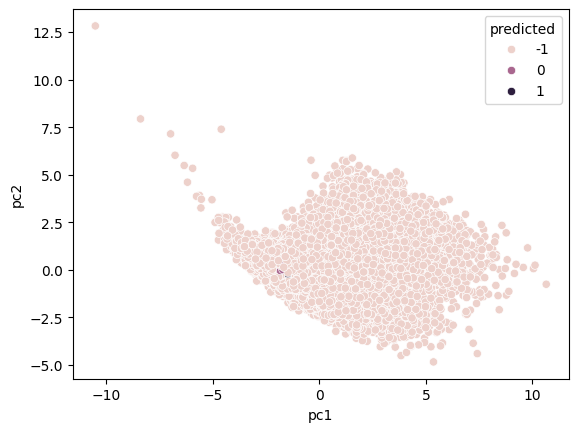

In [145]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'predicted', data=hdb_df)

kind of meh... DBSCAN?

In [146]:
from sklearn.cluster import DBSCAN

In [159]:
db = DBSCAN(min_samples = 50, eps = 5.0)

In [160]:
db_df = hdb_df.copy(deep=True)

In [161]:
db_df['predicted'] = db.fit_predict(db_df[db_df.columns[0:6]].to_numpy())

<Axes: xlabel='pc1', ylabel='pc2'>

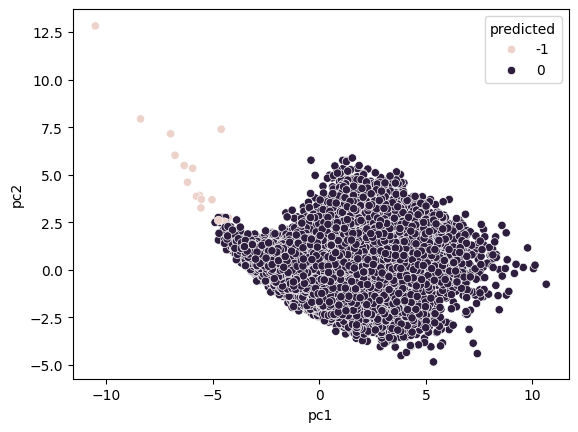

In [162]:
sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'predicted', data=db_df)